In [10]:
import numpy as np
import skimage
import utils
import pathlib
import matplotlib.pyplot as plt

In [1]:
# code reference: https://en.wikipedia.org/wiki/Otsu%27s_method

def compute_otsu_criteria(im, th):
    # create the thresholded image
    thresholded_im = np.zeros(im.shape)
    thresholded_im[im >= th] = 1

    # compute weights
    nb_pixels = im.size
    nb_pixels1 = np.count_nonzero(thresholded_im)
    weight1 = nb_pixels1 / nb_pixels
    weight0 = 1 - weight1

    # if one the classes is empty, eg all pixels are below or above the threshold, that threshold will not be considered
    # in the search for the best threshold
    if weight1 == 0 or weight0 == 0:
        return np.inf

    # find all pixels belonging to each class
    val_pixels1 = im[thresholded_im == 1]
    val_pixels0 = im[thresholded_im == 0]

    # compute variance of these classes
    var0 = np.var(val_pixels0) if len(val_pixels0) > 0 else 0
    var1 = np.var(val_pixels1) if len(val_pixels1) > 0 else 0

    return weight0 * var0 + weight1 * var1



In [12]:
def otsu_thresholding(im: np.ndarray) -> int:
    """
        Otsu's thresholding algorithm that segments an image into 1 or 0 (True or False)
        The function takes in a grayscale image and outputs a boolean image

        args:
            im: np.ndarray of shape (H, W) in the range [0, 255] (dtype=np.uint8)
        return:
            (int) the computed thresholding value
    """
    assert im.dtype == np.uint8
    ### START YOUR CODE HERE ### (You can change anything inside this block) 

    # code reference: https://en.wikipedia.org/wiki/Otsu%27s_method
    
    # testing all thresholds from 0 to the maximum of the image
    threshold_range = range(np.max(im)+1)
    criterias = [compute_otsu_criteria(im, th) for th in threshold_range]

    # best threshold is the one minimizing the Otsu criteria
    best_threshold = threshold_range[np.argmin(criterias)]

    return best_threshold
    ### END YOUR CODE HERE ###

Reading image: images/thumbprint.png
Found optimal threshold: 154


/tmp/ipykernel_49992/2733271520.py:15: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert segmented_image.dtype == np.bool, "Expected thresholded image dtype to be np.bool. Was: {}".format(segmented_image.dtype)


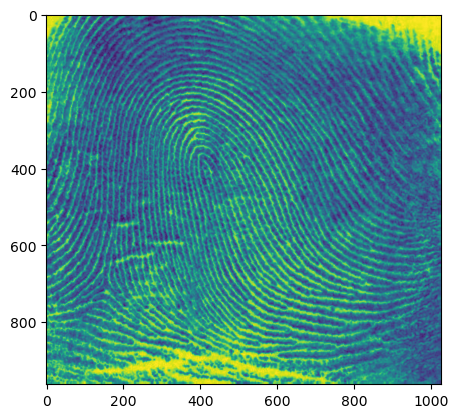

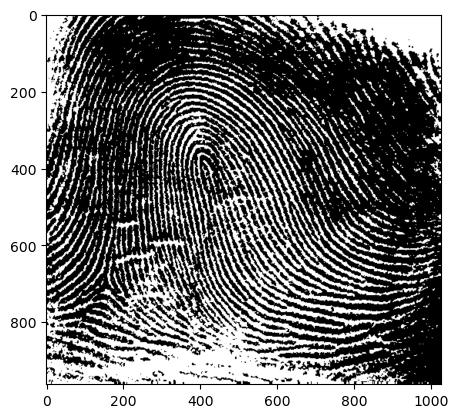

Saving image to: image_processed/thumbprint-segmented.png
Reading image: images/polymercell.png
Found optimal threshold: 182


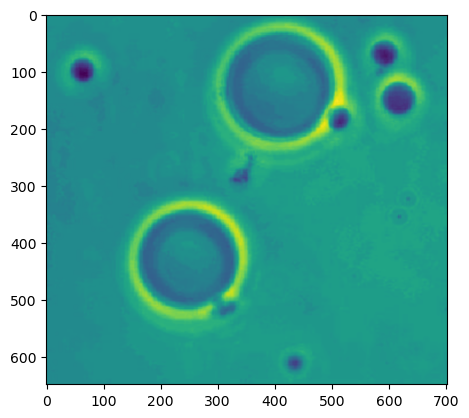

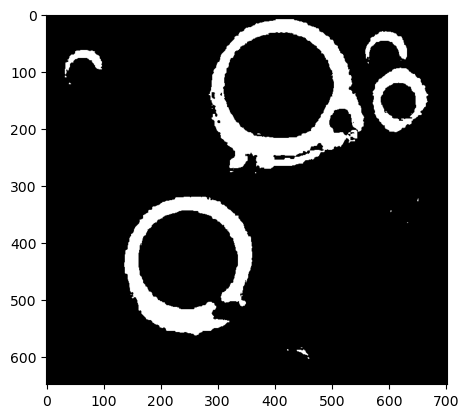

Saving image to: image_processed/polymercell-segmented.png


In [13]:
if __name__ == "__main__":
    # DO NOT CHANGE
    plt.figure()
    impaths_to_segment = [
        pathlib.Path("thumbprint.png"),
        pathlib.Path("polymercell.png")
    ]
    for impath in impaths_to_segment:
        im = utils.read_image(impath)
        threshold = otsu_thresholding(im)
        print("Found optimal threshold:", threshold)
        # Segment the image by threshold
        segmented_image = (im >= threshold)
        assert im.shape == segmented_image.shape, "Expected image shape ({}) to be same as thresholded image shape ({})".format(im.shape, segmented_image.shape)
        assert segmented_image.dtype == np.bool, "Expected thresholded image dtype to be np.bool. Was: {}".format(segmented_image.dtype)

        segmented_image = utils.to_uint8(segmented_image)

        plt.imshow(im)
        plt.show()
        plt.imshow(segmented_image, cmap='gray')
        plt.show()

        save_path = "{}-segmented.png".format(impath.stem)
        utils.save_im(save_path, segmented_image)
